In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from osm_parser import OSMParser
from geopy.distance import geodesic
import networkx as nx


parser = OSMParser("map.osm")



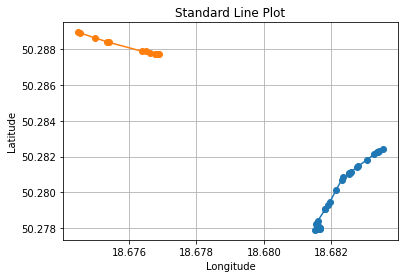

In [10]:
import matplotlib.pyplot as plt

way = parser.get_way(4587568) 
way2 = parser.get_way(4576735) 

if way and way2: 
    lat = [x.lat for x in way.nodes]
    lon = [ x.lon for x in way.nodes]

    lat2 = [x.lat for x in way2.nodes]
    lon2 = [ x.lon for x in way2.nodes]
    
    bounds = parser.get_bounds()

    plt.plot(lon, lat, marker='o', linestyle='-')
    plt.plot(lon2, lat2, marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel("Longitude")

    plt.ylabel("Latitude")
    plt.title("Standard Line Plot")

    # plt.ylim(bounds.min_lat, bounds.max_lat)
    # plt.xlim(bounds.min_lon, bounds.max_lon)
    # Display the plot
    plt.grid()
    plt.show()

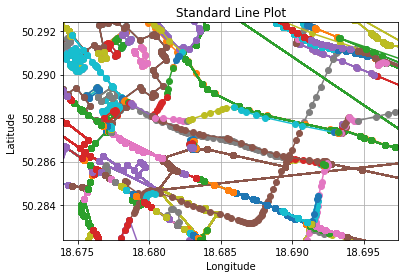

In [69]:
from models import Way



for rel in parser.relations: 
    rel = parser.get_relation(rel.id)
    if rel: 
        for way in rel.ways:
            lat = [x.lat for x in way.nodes]
            lon = [x.lon for x in way.nodes]
            plt.plot(lon, lat, marker='o', linestyle='-', )

plt.xlabel("Longitude")

plt.ylabel("Latitude ")
plt.title("Standard Line Plot")

plt.ylim(bounds.min_lat, bounds.max_lat)
plt.xlim(bounds.min_lon, bounds.max_lon)
plt.grid()
plt.show()


In [75]:
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

In [146]:
G = nx.Graph()

def addNodeToGraph(G, road, index, road_start = False, road_end = False):
    Anode = (
                    (road.nodes[index].lat, road.nodes[index].lon))
    Bnode = (
                    (road.nodes[index+1].lat, road.nodes[index+1].lon))
    if not G.has_edge(Anode, Bnode):
        G.add_edge(Anode, Bnode)

for el in parser.relations:
    rel = parser.get_relation(el.id)
    for way in rel.ways:
        road = parser.get_way(way.id)
        # First and last node of the road:
        addNodeToGraph(G, road, 0, road_start=True)
        addNodeToGraph(G, road, len(road.nodes)-2, road_end=True)

        # Rest of the road
        for index in range(1, len(road.nodes)-3, 1):
             addNodeToGraph(G, road, index)


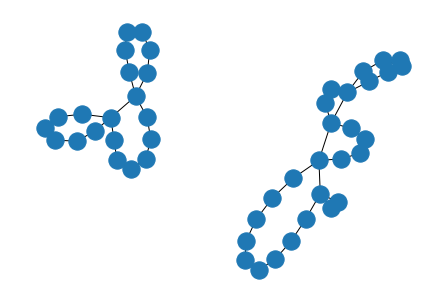

In [127]:
pos = nx.spring_layout(G)
nx.draw(G)

In [147]:
postions = {}
for node in G.nodes:
    postions[node] = node

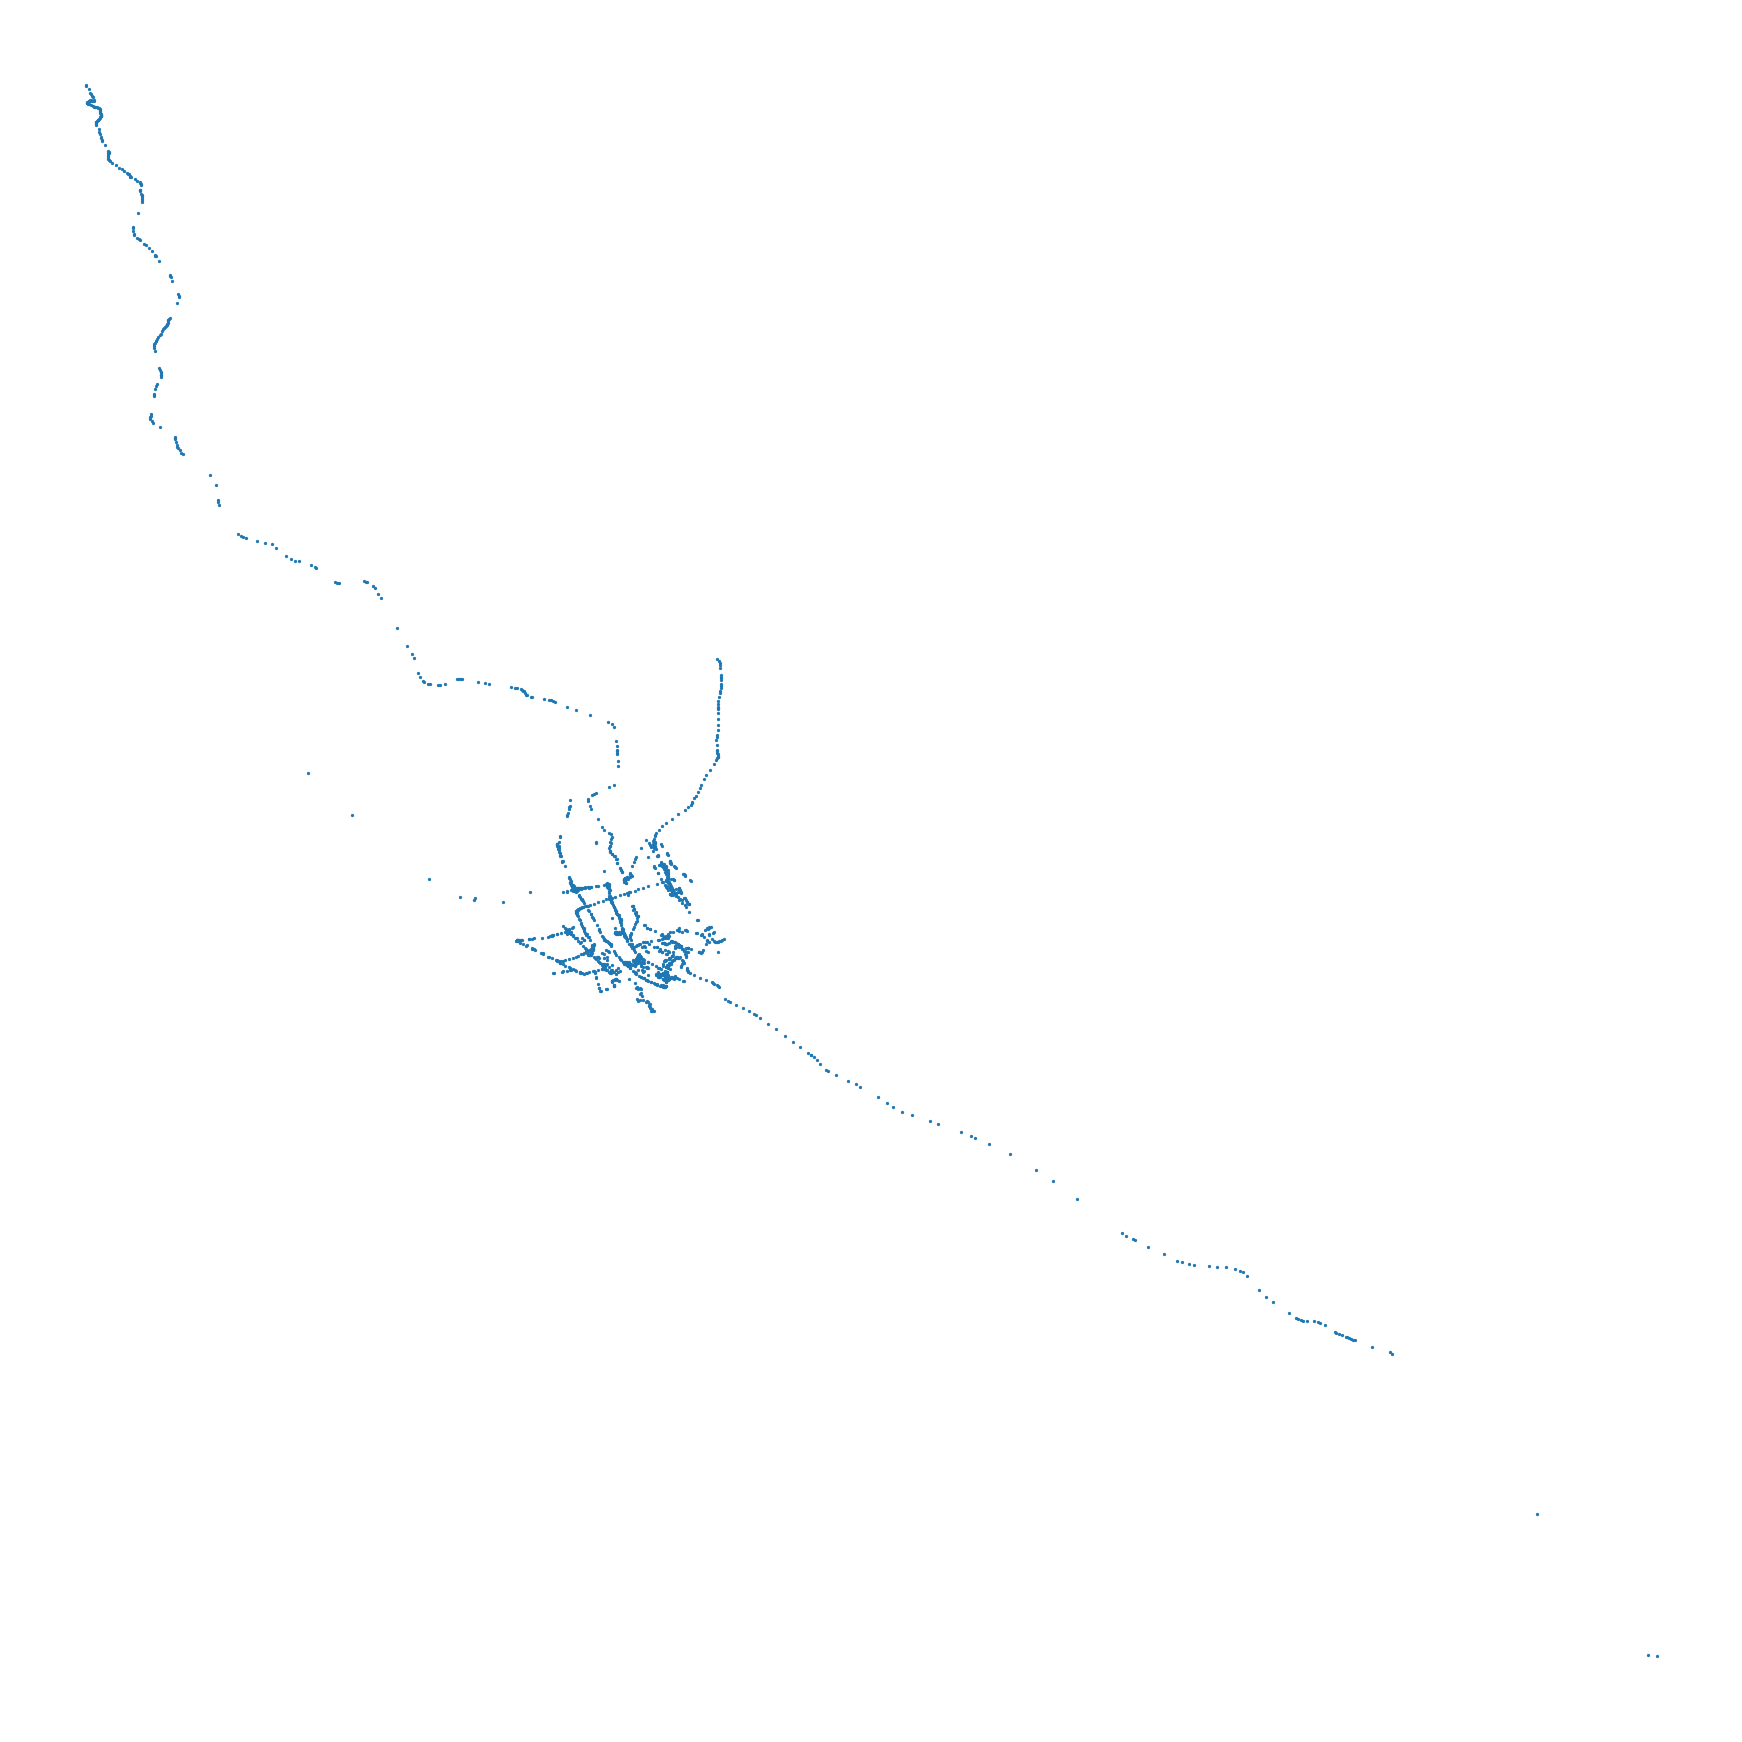

In [163]:
plt.figure(1,figsize=(24,24)) 
nx.draw(G, postions, node_size=5, edgelist=[])